In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.regression import *

In [2]:
df_treated = pd.read_csv('data/df_treated.csv').set_index('date')
df_treated.index = pd.to_datetime(df_treated.index)

Nov_df = pd.read_csv('data/Nov_df.csv').set_index('date')
Nov_df.index = pd.to_datetime(Nov_df.index)

In [3]:
df_hour = df_treated.resample('H').last()
Nov_hour = Nov_df.resample('H').last()

In [4]:
numeric_col = ['Building0', 'Building1', 'Building3', 'Building4', 'Building5',
                   'Building6', 'Solar0', 'Solar1', 'Solar2', 'Solar3', 'Solar4', 'Solar5',
                   'temperature', 'dewpoint_temperature', 'wind_speed',
                   'mean_sea_level_pressure', 'relative_humidity_01',
                   'surface_solar_radiation', 'surface_thermal_radiation',
                   'total_cloud_cover']
df_treated[numeric_col] = df_treated[numeric_col].apply(pd.to_numeric)
df_numerics = df_treated[numeric_col]

categorical_col = ['COVID', 'Break', 'Semester', 'Exams', 'Monash_occupancy',
               'month', 'day', 'hour']
df_treated[categorical_col] = df_treated[categorical_col].astype('category')
df_categorical = df_treated[categorical_col]

Nov_hour[numeric_col] = Nov_hour[numeric_col].apply(pd.to_numeric)
Nov_hour[categorical_col] = Nov_hour[categorical_col].astype('category')

# Buildings

In [5]:
y_train_B0 = df_hour[:'2020-09-21 14:00:00']
y_test_B0 = df_hour['2020-09-21 15:00:00':]

print(y_train_B0.shape, y_test_B0.shape)
y_train_B0.shape[0] + y_test_B0.shape[0]

(8727, 28) (969, 28)


9696

## Building0

In [6]:
s_B0 = setup(data=y_train_B0, test_data=y_test_B0, target='Building0', fold_strategy='timeseries', 
          fold=3, transform_target=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Building0
2,Original Data,"(8727, 28)"
3,Missing Values,True
4,Numeric Features,22
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8727, 42)"


In [7]:
best_B0 = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,28.0648,1322.3395,35.9765,0.0808,0.2682,0.2475,0.9700
lightgbm,Light Gradient Boosting Machine,30.6571,1690.3535,40.0343,-0.3410,0.2833,0.2491,0.2067
br,Bayesian Ridge,31.0620,1482.3059,38.4360,0.1168,0.2795,0.2557,0.0533
rf,Random Forest Regressor,30.3465,1649.1318,40.0171,-0.2206,0.2949,0.2576,1.9133
gbr,Gradient Boosting Regressor,31.0903,1693.7856,39.9783,-0.3519,0.2842,0.2595,1.0067
omp,Orthogonal Matching Pursuit,31.7625,1554.4877,39.3955,0.0790,0.2932,0.2758,0.5100
huber,Huber Regressor,30.7050,1544.5540,39.0544,0.1571,0.2943,0.2778,0.0833
ridge,Ridge Regression,35.2369,1866.1787,43.0063,-0.1353,0.3015,0.2828,0.0467
lr,Linear Regression,35.4635,1884.6031,43.2264,-0.1495,0.3023,0.2842,1.0300
en,Elastic Net,32.4485,1636.4153,40.3983,0.0420,0.3000,0.2850,0.0667


In [8]:
et_B0 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.9453,827.7661,28.7709,0.6908,0.1531,0.1213
1,34.3243,1709.2137,41.3426,-0.9441,0.2341,0.2241
2,28.9248,1430.0388,37.8159,0.4956,0.4174,0.3971
Mean,28.0648,1322.3395,35.9765,0.0808,0.2682,0.2475
Std,5.4957,367.8195,5.2946,0.7291,0.1106,0.1138


In [9]:
tuned_et_B0 = tune_model(et_B0)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.5430,1843.3515,42.9343,0.3115,0.2534,0.2079
1,30.3530,1329.1070,36.4569,-0.5117,0.2270,0.2075
2,33.3003,2159.2907,46.4682,0.2383,0.4857,0.5077
Mean,32.0654,1777.2498,41.9531,0.0127,0.3221,0.3077
Std,1.2497,342.1289,4.1455,0.3720,0.1162,0.1414


In [10]:
predictions_B0 = predict_model(tuned_et_B0, data=df_hour)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,30.7007,2122.8492,46.0744,0.3529,0.3823,0.3299


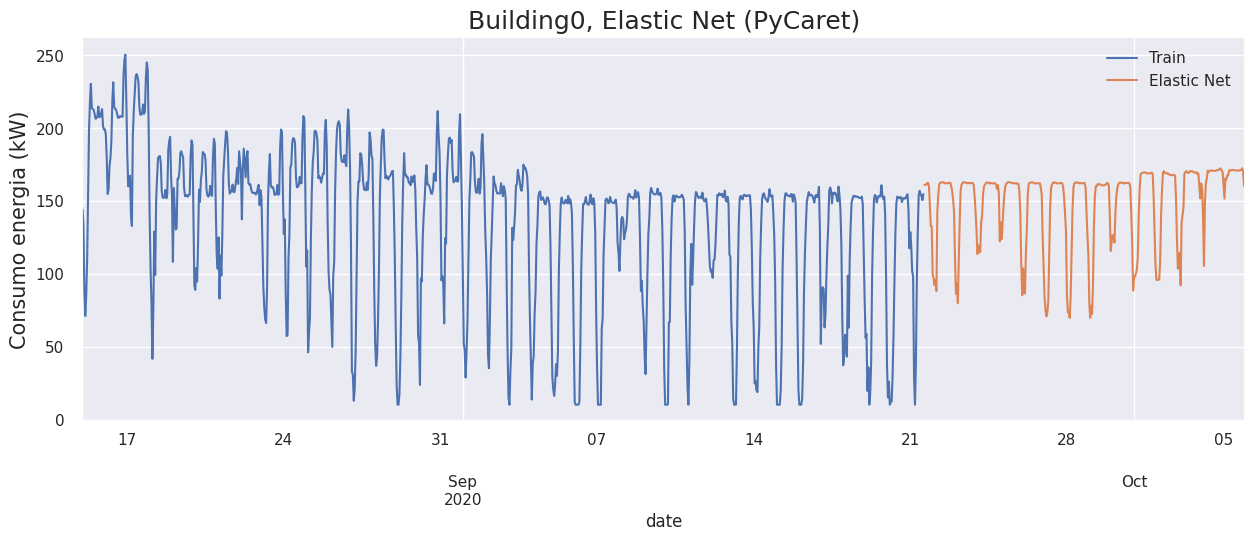

In [11]:
sns.set(rc={'figure.figsize':(15, 5)})
ax = (y_train_B0.Building0['2020-08-15':].plot(linestyle='-')), (predictions_B0.Label['2020-09-21 15:00:00':'2020-10-05'].plot(linestyle='-'))
plt.title('Building0, Elastic Net (PyCaret)', fontsize = 18) 
plt.ylabel('Consumo energia (kW)', fontsize = 15)
plt.legend(labels=["Train","Elastic Net"])
plt.savefig('images/B0_PyCaret.png')
plt.show()

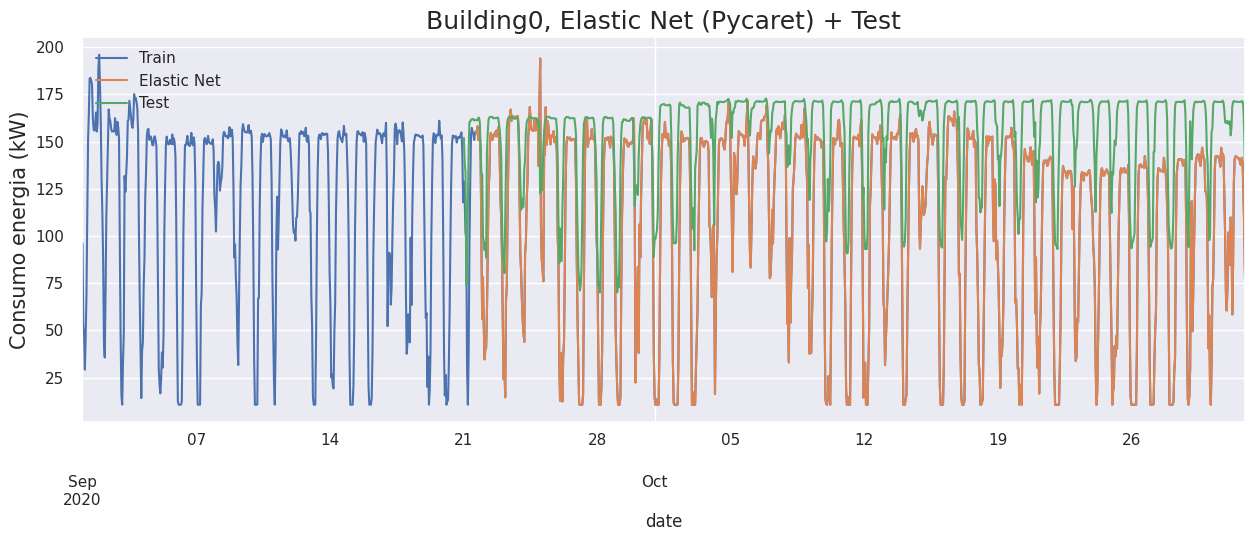

In [12]:
sns.set(rc={'figure.figsize':(15, 5)})
ax = (df_hour.Building0['2020-09-01':].plot(linestyle='-')), \
     (y_test_B0.Building0['2020-09-21':].plot(linestyle='-')), \
     (predictions_B0.Label['2020-09-21':].plot(linestyle='-'))
plt.title('Building0, Elastic Net (Pycaret) + Test', fontsize = 18) 
plt.ylabel('Consumo energia (kW)', fontsize = 15)
plt.legend(labels=["Train","Elastic Net", "Test"])
plt.savefig('images/B0_PyCaret_test.png')
plt.show()

## Building 3

In [13]:
y_train_B3 = df_hour[:'2020-09-21 14:00:00']
y_test_B3 = df_hour['2020-09-21 15:00:00':]

print(y_train_B3.shape, y_test_B3.shape)
y_train_B3.shape[0] + y_test_B3.shape[0]

(8727, 28) (969, 28)


9696

In [14]:
s_B3 = setup(data=y_train_B3, test_data=y_test_B3, target='Building3', fold_strategy='timeseries', 
          fold=3, transform_target=True, session_id=123, feature_interaction=True)

,Description,Value
0,session_id,123
1,Target,Building3
2,Original Data,"(8727, 28)"
3,Missing Values,True
4,Numeric Features,22
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8727, 72)"


In [15]:
best_B3 = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,42.3738,4069.8862,60.6537,0.8290,0.1272,0.1027,1.7200
rf,Random Forest Regressor,45.6390,4604.2622,65.5732,0.8027,0.1381,0.1094,4.4467
gbr,Gradient Boosting Regressor,46.4909,4716.2685,66.1888,0.7982,0.1380,0.1109,2.8533
lightgbm,Light Gradient Boosting Machine,47.3775,5059.4401,68.5702,0.7731,0.1404,0.1127,0.4033
ada,AdaBoost Regressor,51.5211,5369.8232,71.4820,0.8068,0.1518,0.1219,1.0600
knn,K Neighbors Regressor,57.9060,7323.7145,82.3608,0.6860,0.1685,0.1392,0.9900
dt,Decision Tree Regressor,58.5429,7376.5869,83.4024,0.6816,0.1720,0.1393,0.5367
en,Elastic Net,69.7483,10349.4570,97.4824,0.6623,0.1996,0.1609,0.9867
lasso,Lasso Regression,70.7660,11208.2853,100.7852,0.6441,0.2018,0.1626,0.5433
lr,Linear Regression,83.9084,78261.3921,207.8474,-0.4438,0.2136,0.1784,0.9500


In [16]:
et_B3 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.0968,4529.1525,67.2990,0.9258,0.1173,0.0827
1,59.3837,6537.6121,80.8555,0.6317,0.1787,0.1597
2,24.6409,1142.8941,33.8067,0.9293,0.0857,0.0657
Mean,42.3738,4069.8862,60.6537,0.8290,0.1272,0.1027
Std,14.1929,2226.1985,19.7740,0.1395,0.0386,0.0409


In [17]:
tuned_et_B3 = tune_model(et_B3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,47.2853,5047.6741,71.0470,0.9173,0.1182,0.0894
1,60.0810,5837.0275,76.4004,0.6712,0.1890,0.1710
2,34.0228,1890.0285,43.4745,0.8831,0.1093,0.0903
Mean,47.1297,4258.2433,63.6406,0.8239,0.1388,0.1169
Std,10.6388,1705.3056,14.4261,0.1089,0.0357,0.0382


In [18]:
predictions_B3 = predict_model(tuned_et_B3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,33.2291,1642.1505,40.5235,0.8250,0.1156,0.1035


In [19]:
index = y_test_B3.index
predictions_B3 = predictions_B3.set_index(index)

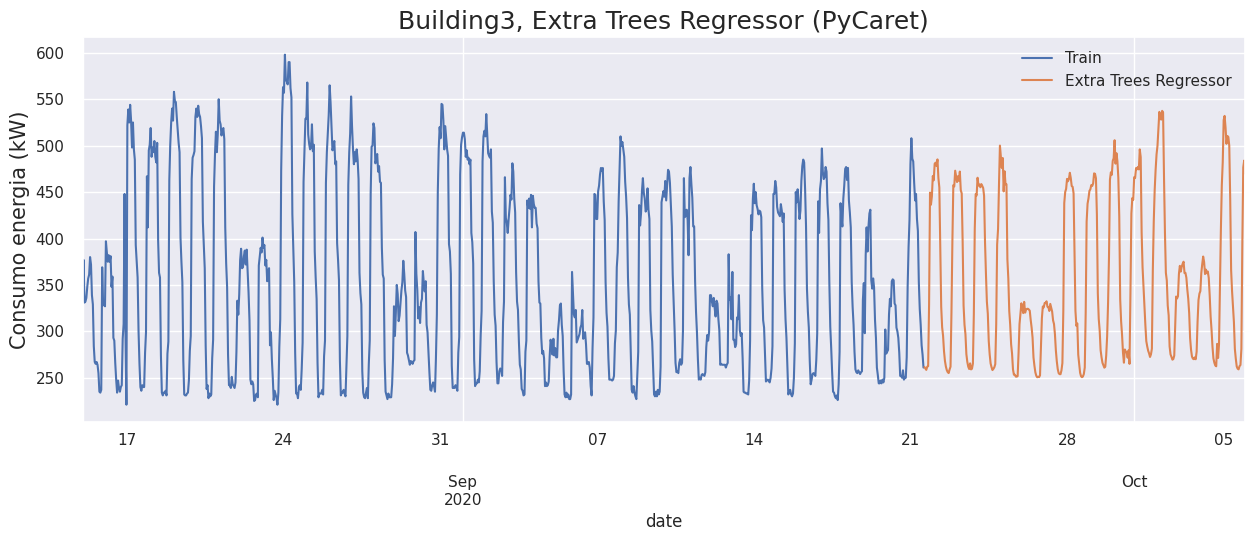

In [20]:
sns.set(rc={'figure.figsize':(15, 5)})
ax = (y_train_B3.Building3['2020-08-15':].plot(linestyle='-')), (predictions_B3.Label['2020-09-21 15:00:00':'2020-10-05'].plot(linestyle='-'))
plt.title('Building3, Extra Trees Regressor (PyCaret)', fontsize = 18) 
plt.ylabel('Consumo energia (kW)', fontsize = 15)
plt.legend(labels=["Train","Extra Trees Regressor"])
plt.savefig('images/B3_PyCaret.png')
plt.show()

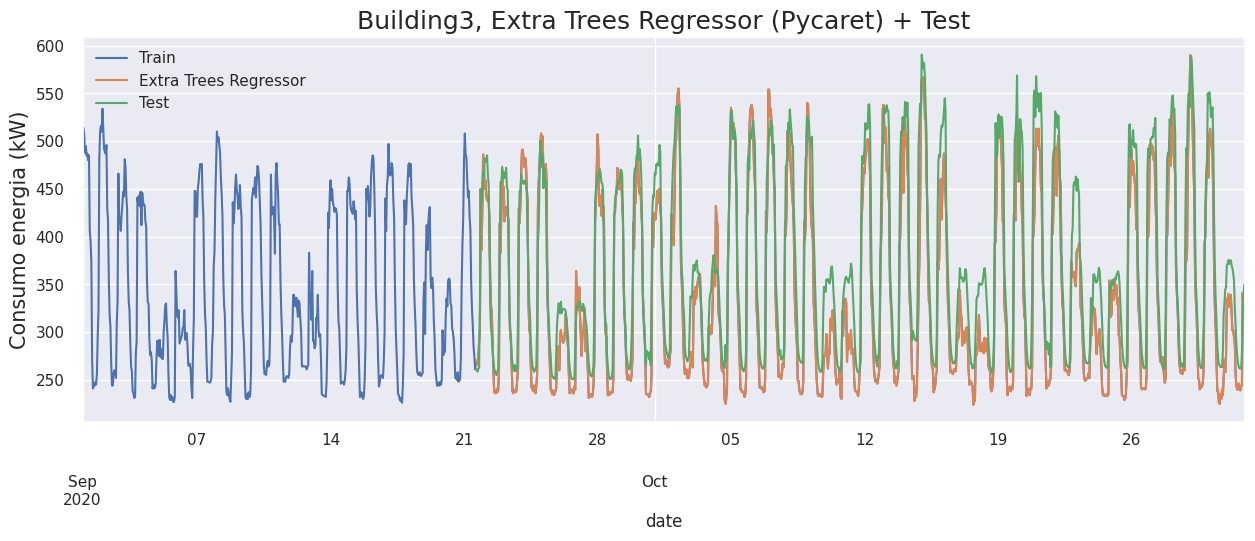

In [21]:
sns.set(rc={'figure.figsize':(15, 5)})
ax = (df_hour.Building3['2020-09-01':].plot(linestyle='-')), \
     (y_test_B3.Building3['2020-09-21':].plot(linestyle='-')), \
     (predictions_B3.Label['2020-09-21':].plot(linestyle='-'))
plt.title('Building3, Extra Trees Regressor (Pycaret) + Test', fontsize = 18) 
plt.ylabel('Consumo energia (kW)', fontsize = 15)
plt.legend(labels=["Train","Extra Trees Regressor", "Test"])
plt.savefig('images/B3_PyCaret_test.png')
plt.show()

# Solar panels

## Solar1

In [22]:
y_train_S1 = df_hour['2020-05-21 05:00:00':'2020-10-15 14:00:00']
y_test_S1 = df_hour['2020-10-15 15:00:00':]

print(y_train_S1.shape, y_test_S1.shape)
y_train_S1.shape[0] + y_test_S1.shape[0]

(3538, 28) (393, 28)


3931

In [23]:
s_S1 = setup(data=y_train_S1, test_data=y_test_S1, target='Solar1', fold_strategy='timeseries', 
          fold=3, session_id=456)

,Description,Value
0,session_id,456
1,Target,Solar1
2,Original Data,"(3538, 28)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3538, 31)"


In [24]:
best_S1 = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1332,0.0942,0.2915,0.9898,0.0458,0.0947,0.2633
rf,Random Forest Regressor,0.1430,0.1083,0.3125,0.9885,0.0484,0.0958,0.4967
lightgbm,Light Gradient Boosting Machine,0.1416,0.1159,0.3229,0.9877,0.0471,0.0969,0.0967
gbr,Gradient Boosting Regressor,0.1432,0.1044,0.3058,0.9891,0.0479,0.1050,0.3600
dt,Decision Tree Regressor,0.1608,0.1393,0.3596,0.9851,0.0561,0.1105,0.0167
ridge,Ridge Regression,0.1666,0.0896,0.2814,0.9906,0.0746,0.3206,0.0100
omp,Orthogonal Matching Pursuit,0.1763,0.1137,0.3255,0.9880,0.0678,0.3216,0.0067
br,Bayesian Ridge,0.1675,0.0914,0.2825,0.9905,0.0760,0.3303,0.0067
lr,Linear Regression,0.1658,0.0928,0.2818,0.9904,0.0747,0.3382,0.0067
en,Elastic Net,0.3052,0.3591,0.5816,0.9584,0.1190,0.5716,0.0100


In [25]:
et_S1 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0697,0.0310,0.1761,0.9942,0.0357,0.0774
1,0.1860,0.1691,0.4112,0.9818,0.0574,0.1233
2,0.1439,0.0825,0.2871,0.9932,0.0442,0.0835
Mean,0.1332,0.0942,0.2915,0.9898,0.0458,0.0947
Std,0.0481,0.0570,0.0960,0.0056,0.0089,0.0203


In [26]:
tuned_et_S1 = tune_model(et_S1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0735,0.0311,0.1765,0.9942,0.0377,0.0846
1,0.1998,0.1917,0.4379,0.9794,0.0620,0.1531
2,0.1637,0.1035,0.3217,0.9915,0.0499,0.1075
Mean,0.1457,0.1088,0.3120,0.9884,0.0499,0.1151
Std,0.0531,0.0657,0.1069,0.0064,0.0099,0.0284


In [27]:
predictions_S1 = predict_model(tuned_et_S1, data=y_test_S1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1376,0.0696,0.2637,0.9951,0.0458,0.1149


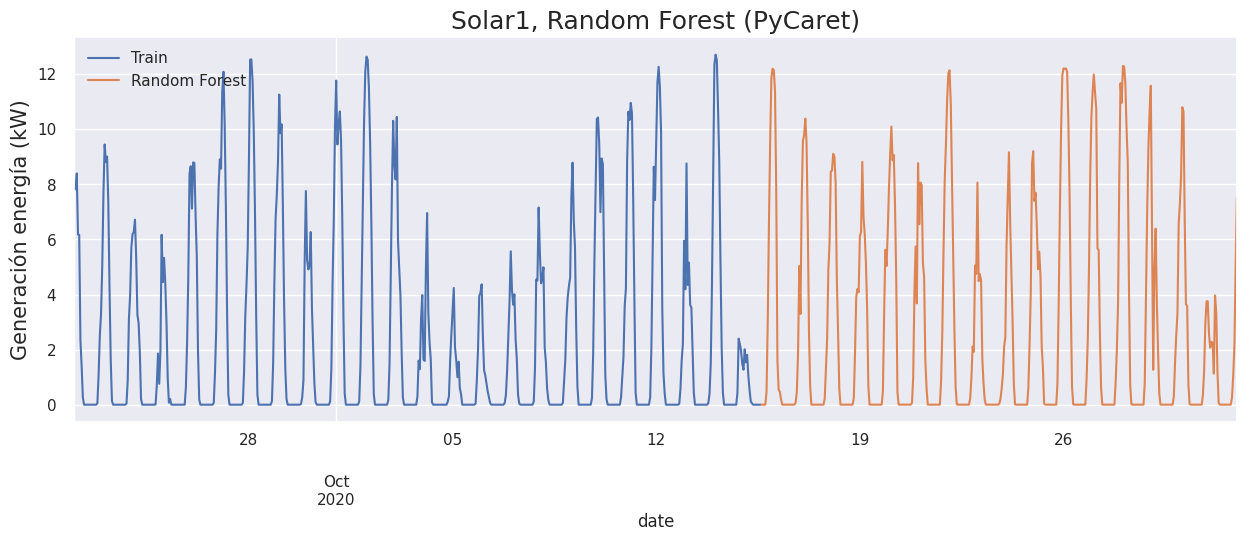

In [28]:
sns.set(rc={'figure.figsize':(15, 5)})
ax = (y_train_S1.Solar1['2020-09-22':].plot(linestyle='-')), (predictions_S1.Label['2020-10-15 15:00:00':].plot(linestyle='-'))
plt.title('Solar1, Random Forest (PyCaret)', fontsize = 18) 
plt.ylabel('Generación energía (kW)', fontsize = 15)
plt.legend(labels=["Train","Random Forest"])
plt.savefig('images/S1_PyCaret.png')
plt.show()

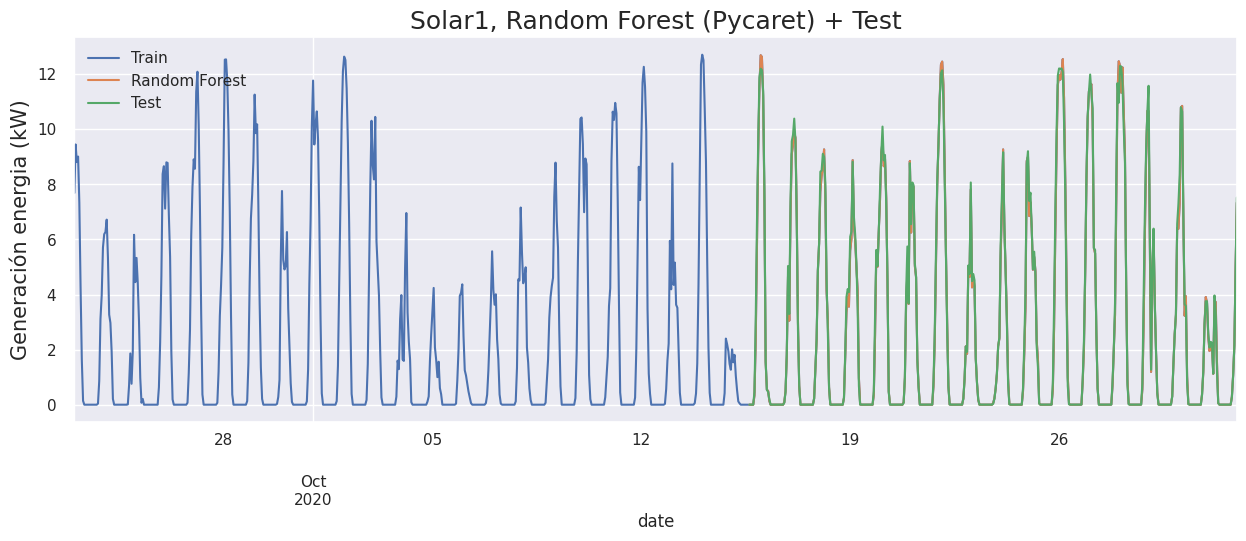

In [29]:
sns.set(rc={'figure.figsize':(15, 5)})
ax = (df_hour.Solar1['2020-09-23':].plot(linestyle='-')), \
     (y_test_S1.Solar1['2020-10-15':].plot(linestyle='-')), \
     (predictions_S1.Label['2020-10-15':].plot(linestyle='-'))
plt.title('Solar1, Random Forest (Pycaret) + Test', fontsize = 18) 
plt.ylabel('Generación energia (kW)', fontsize = 15)
plt.legend(labels=["Train","Random Forest", "Test"])
plt.savefig('images/S1_PyCaret_test.png')
plt.show()

## Solar3

In [30]:
y_train_S3 = df_hour['2020-05-21 05:00:00':'2020-10-15 14:00:00']
y_test_S3 = df_hour['2020-10-15 15:00:00':]

print(y_train_S3.shape, y_test_S3.shape)
y_train_S3.shape[0] + y_test_S3.shape[0]

(3538, 28) (393, 28)


3931

In [31]:
s_S3 = setup(data=y_train_S3, test_data=y_test_S3, target='Solar3', fold_strategy='timeseries', 
          fold=3, transform_target=False, session_id=1234)

,Description,Value
0,session_id,1234
1,Target,Solar3
2,Original Data,"(3538, 28)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3538, 31)"


In [32]:
best_S3 = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0863,0.0578,0.2224,0.9917,0.0398,0.0723,0.2500
rf,Random Forest Regressor,0.0906,0.0622,0.2293,0.9913,0.0401,0.0757,0.4900
lightgbm,Light Gradient Boosting Machine,0.0984,0.0770,0.2544,0.9889,0.0410,0.0849,0.1000
dt,Decision Tree Regressor,0.0927,0.0546,0.2225,0.9924,0.0436,0.0857,0.0167
gbr,Gradient Boosting Regressor,0.0858,0.0486,0.2033,0.9931,0.0373,0.0959,0.4133
omp,Orthogonal Matching Pursuit,0.0799,0.0273,0.1532,0.9965,0.0388,0.1409,0.0067
ridge,Ridge Regression,0.0810,0.0202,0.1366,0.9972,0.0462,0.2459,0.0067
br,Bayesian Ridge,0.0814,0.0202,0.1363,0.9972,0.0471,0.2524,0.0100
lr,Linear Regression,0.0831,0.0205,0.1375,0.9972,0.0490,0.2596,0.0133
ada,AdaBoost Regressor,0.1893,0.0782,0.2662,0.9891,0.1151,0.5164,0.1567


In [33]:
et_S3 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0409,0.0142,0.1190,0.9960,0.0320,0.0573
1,0.1231,0.1160,0.3406,0.9834,0.0490,0.0969
2,0.0948,0.0431,0.2077,0.9956,0.0383,0.0626
Mean,0.0863,0.0578,0.2224,0.9917,0.0398,0.0723
Std,0.0341,0.0429,0.0911,0.0058,0.0070,0.0176


In [34]:
tuned_et_S3 = tune_model(et_S3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1144,0.0596,0.2441,0.9831,0.0601,0.3012
1,0.2485,0.3171,0.5631,0.9547,0.0960,0.6041
2,0.2286,0.2081,0.4561,0.9788,0.0772,0.2404
Mean,0.1972,0.1949,0.4211,0.9722,0.0777,0.3819
Std,0.0591,0.1056,0.1326,0.0125,0.0147,0.1591


In [35]:
predictions_S3 = predict_model(tuned_et_S3, data=df_hour)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.4389,1.1780,1.0853,0.8051,0.3546,1.0161


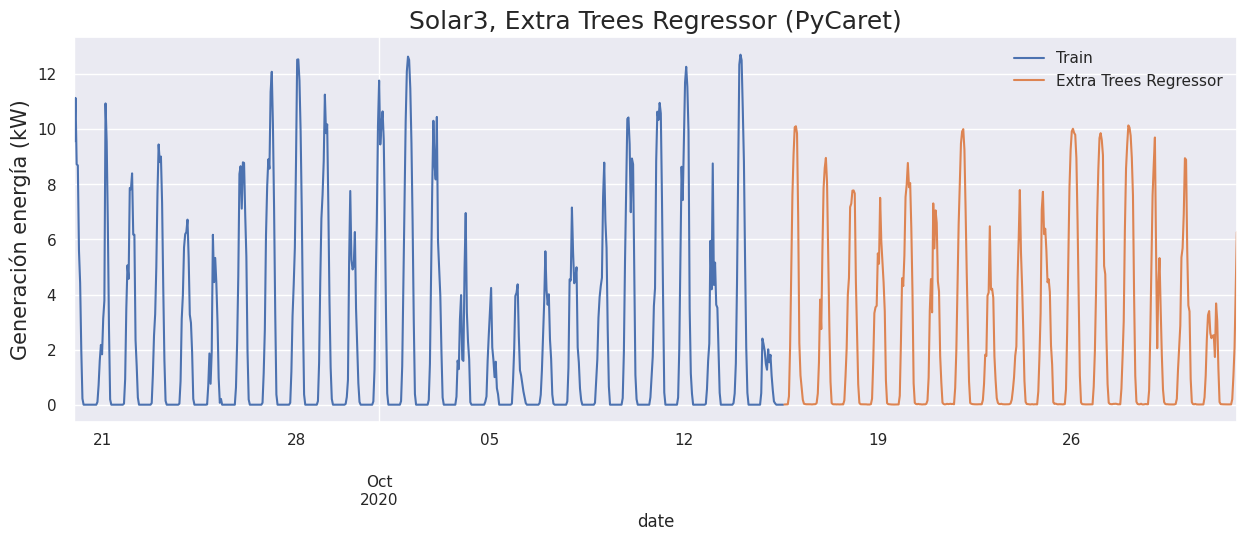

In [36]:
sns.set(rc={'figure.figsize':(15, 5)})
ax = (y_train_S3.Solar1['2020-09-20':].plot(linestyle='-')), (predictions_S3.Label['2020-10-15 15:00:00':].plot(linestyle='-'))
plt.title('Solar3, Extra Trees Regressor (PyCaret)', fontsize = 18) 
plt.ylabel('Generación energía (kW)', fontsize = 15)
plt.legend(labels=["Train","Extra Trees Regressor"])
plt.savefig('images/S3_PyCaret.png')
plt.show()

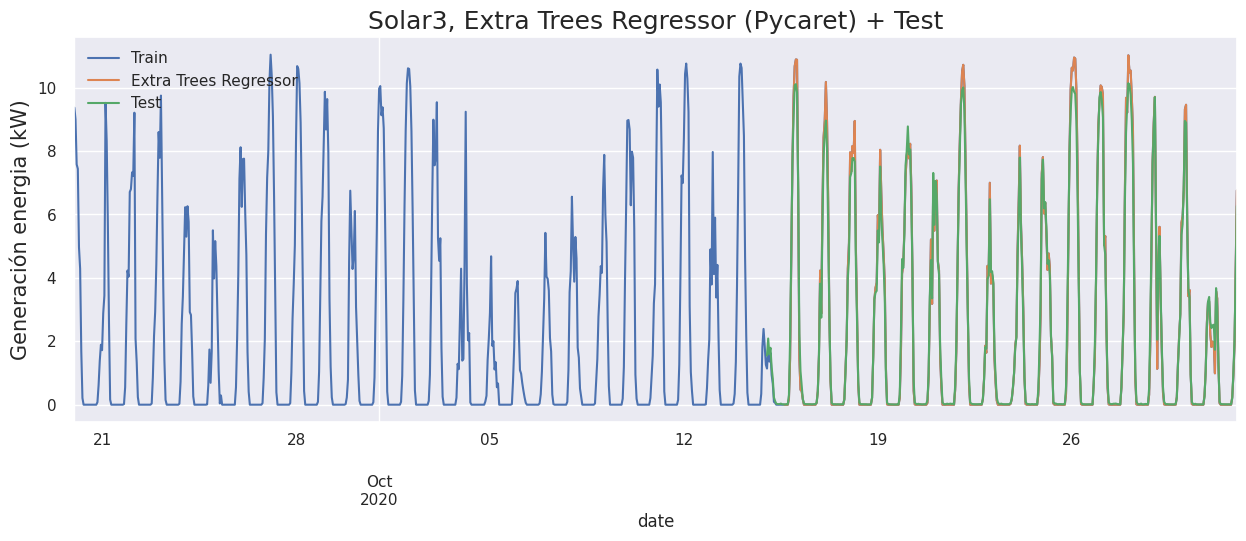

In [37]:
sns.set(rc={'figure.figsize':(15, 5)})
ax = (df_hour.Solar3['2020-09-20':].plot(linestyle='-')), \
     (y_test_S3.Solar3['2020-10-15':].plot(linestyle='-')), \
     (predictions_S3.Label['2020-10-15':].plot(linestyle='-'))
plt.title('Solar3, Extra Trees Regressor (Pycaret) + Test', fontsize = 18) 
plt.ylabel('Generación energia (kW)', fontsize = 15)
plt.legend(labels=["Train","Extra Trees Regressor", "Test"])
plt.savefig('images/S3_PyCaret_test.png')
plt.show()

## Comparación de errores

In [38]:
comparacion = {'Modelos': ['Building0 Naive', 'Building0 ETS', 'Building0 Omp (PyCaret)', \
                           'Building3 Naive', 'Building3 ETS', 'Building3 Et (PyCaret)', \
                           'Solar1 Naive', 'Solar1 ETS', 'Solar1 Rf (PyCaret)', \
                           'Solar3 Naive', 'Solar3 ETS', 'Solar3 Omp (PyCaret)'],
               'MAE': ['25.97', '19.22', '27.6264', '43.7', '72.21', '48.2420',
                       '1.425', '1.33', '0.1354', '1.216', '1.213', '0.0662'],
               'MSE': ['1.64e+03', '807.7', '1356.0238', '4.12e+03', '8.80e+03', '5421.3177',
                       '7.012', '5.243', '0.1024', '5.304', '4.296', '0.0240'],
               'R2': ['0.3621', '0.6869', '0.0627', '0.56', '0.0619', '0.7937',
                      '0.5015', '0.6273', '0.9889', '0.5221', '0.613', '0.9970'],
               'MAPE': ['0.9214', '0.3601', '0.2254', '0.1322', '0.223', '0.1121',
                        '0.434', '4.15e+13', '0.0908', '0.4053', '3.53e+13', '0.0734']}

comparacion = pd.DataFrame(comparacion)
comparacion

,Modelos,MAE,MSE,R2,MAPE
0,Building0 Naive,25.97,1.64e+03,0.3621,0.9214
1,Building0 ETS,19.22,807.7,0.6869,0.3601
2,Building0 Omp (PyCaret),27.6264,1356.0238,0.0627,0.2254
3,Building3 Naive,43.7,4.12e+03,0.56,0.1322
4,Building3 ETS,72.21,8.80e+03,0.0619,0.223
5,Building3 Et (PyCaret),48.2420,5421.3177,0.7937,0.1121
6,Solar1 Naive,1.425,7.012,0.5015,0.434
7,Solar1 ETS,1.33,5.243,0.6273,4.15e+13
8,Solar1 Rf (PyCaret),0.1354,0.1024,0.9889,0.0908
9,Solar3 Naive,1.216,5.304,0.5221,0.4053


### Solar 3

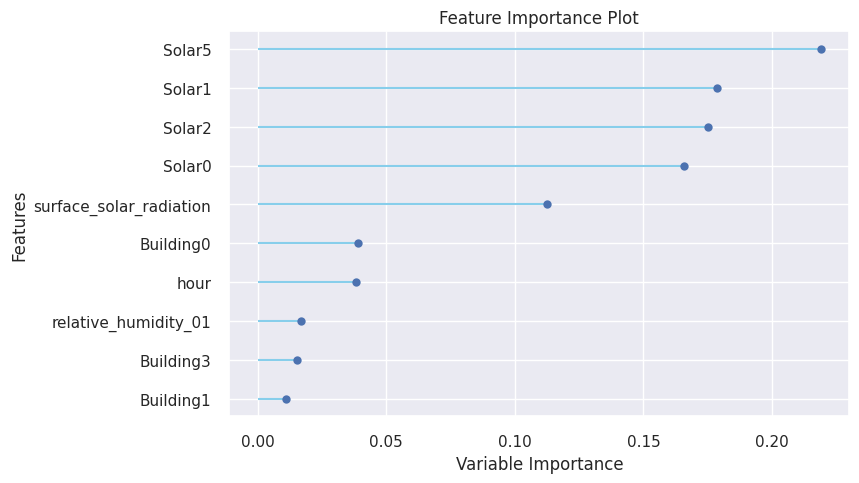

<Figure size 1500x500 with 0 Axes>

In [44]:
plot_model(tuned_et_S3, plot = 'feature')
plt.savefig('images/features_importance.jpg')

In [40]:
evaluate_model(tuned_et_S3)

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,10
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,5


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

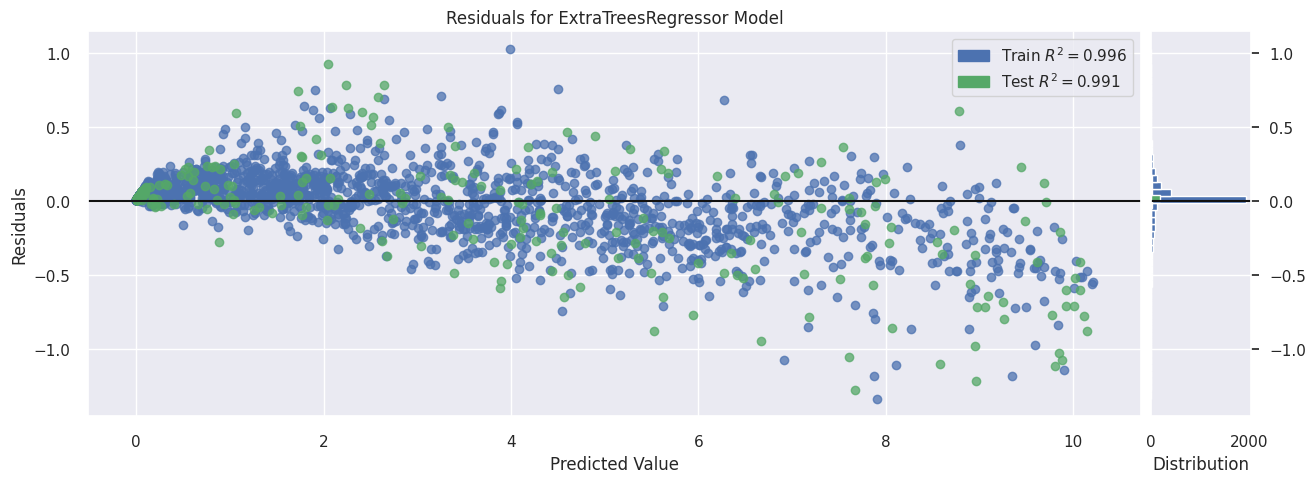

In [41]:
plot_model(tuned_et_S3)